In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

from qutip import *

# Defining the Hamiltonian and decay constants

In [143]:
#N = 20
Nt = 2 # number of transmon states considered
Nr = 2 # number of resonator mode states considered

# system parameter

wr = 7.4658 * 2 * pi      # resonator frequency, GHz
wq = 8.3014 * 2 * pi      # qubit frequency (peak value)
g = 0.045 * 2* pi

dwr = 0.332e-3 * 2 * pi # power linewidth of the resonator mode
decay_rate_resonator = dwr # resonator mode decay rate (κ)

decay_rate_qubit = 10e-3 * 2 * pi # qubit decay rate (Γ1)

In [144]:
# cavity operators
a = tensor(destroy(Nr), qeye(Nt))
nc = a.dag() * a
xc = a + a.dag()
yc = 1j*(a - a.dag())

# atomic operators
sm = tensor(qeye(Nr), destroy(2))
sz = tensor(qeye(Nr), sigmaz())
sx = tensor(qeye(Nr), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

I = tensor(qeye(Nr), qeye(Nt))

# Hamiltonian definition

In [145]:
H = wr * (a.dag() * a + I/2.0) + (wq / 2.0) * sz + g * xc * xq # Jaynes-Cummings Hamiltonian
#RWA

# Spectral lines (anticrossing positions) by hamiltonian diagonalization

In [146]:
# load data from pickle 
import pickle
with open('C:\\Documents\\qubits\\measurements\\хамоны ноября 2016\\two_tone\\#1\\#1.pkl', 'rb') as f:
    tt = pickle.load(f, encoding='latin1')
with open('C:\\Documents\\qubits\\measurements\\хамоны ноября 2016\\anti_all_2\\1\\#1.pkl', 'rb') as f:
    ac = pickle.load(f, encoding='latin1')

In [147]:
# plotting low-power spectrum (anticrossing positions), assuming that the qubit is an (actually linear) LC oscillator
# spectral lines. The lower part where the qubit stops being a transmon is wrong (but we don't care about it anyway)
flux_points = 257
spectral_lines = np.zeros((2, flux_points))
wq_flux_dep = np.zeros((flux_points))
fluxes = np.linspace(-1.0, 1.0, flux_points) #in flux quanta
for flux_id, flux in enumerate(fluxes):
    wq_flux = wq*np.sqrt(np.abs(np.cos(flux*np.pi)))
    H_spectral = wr * (a.dag() * a + I/2.0) + (wq_flux / 2.0) * sz + g * xc * xq # Jaynes-Cummings Hamiltonian
    energies, eigenvectors = H_spectral.eigenstates()
    ground_state_energy = energies[0]
    spectral_lines[:, flux_id] = np.sort(energies[1:3]-ground_state_energy)/(2*np.pi) # 0->1 and 1->2 transitions only
    wq_flux_dep[flux_id] = wq_flux

(-0.82499999999999996, 1.0349999999999999)

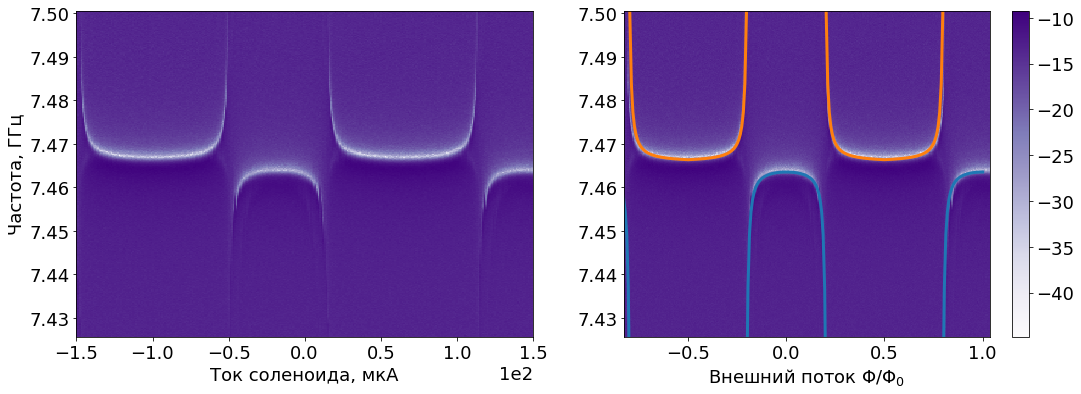

In [158]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
S21 = 10**(ac[1][2]/10)*np.exp(1j*ac[1][3])
delta = np.abs(S21.T-np.mean(S21.T, axis=0))
figs, axes = plt.subplots(1,2, figsize=(18,6))
axes[0].ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
axes[0].pcolormesh(ac[1][0]*1e6, ac[1][1]/1e9, np.log10(np.abs(S21.T))*10, cmap='Purples')
axes[0].set_xlabel('Ток соленоида, мкА')
axes[0].set_ylabel('Частота, ГГц')
axes[1].pcolormesh(ac[1][0]*0.62e4+0.105, ac[1][1]/1e9, np.log10(np.abs(S21.T))*10,  cmap='Purples')
plt.colorbar(axes[1].get_children()[0])
ax_lims = axes[1].get_xlim()
axes[1].plot(fluxes, spectral_lines.T, linewidth=3)
axes[1].set_xlabel('Внешний поток $\\Phi/\\Phi_0$')
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_xlim(ax_lims)
#plt.plot(fluxes, wq_flux_dep/(2*np.pi))

In [124]:
ac

(2, (array([ -1.50000000e-04,  -1.49000000e-04,  -1.48000000e-04,
          -1.47000000e-04,  -1.46000000e-04,  -1.45000000e-04,
          -1.44000000e-04,  -1.43000000e-04,  -1.42000000e-04,
          -1.41000000e-04,  -1.40000000e-04,  -1.39000000e-04,
          -1.38000000e-04,  -1.37000000e-04,  -1.36000000e-04,
          -1.35000000e-04,  -1.34000000e-04,  -1.33000000e-04,
          -1.32000000e-04,  -1.31000000e-04,  -1.30000000e-04,
          -1.29000000e-04,  -1.28000000e-04,  -1.27000000e-04,
          -1.26000000e-04,  -1.25000000e-04,  -1.24000000e-04,
          -1.23000000e-04,  -1.22000000e-04,  -1.21000000e-04,
          -1.20000000e-04,  -1.19000000e-04,  -1.18000000e-04,
          -1.17000000e-04,  -1.16000000e-04,  -1.15000000e-04,
          -1.14000000e-04,  -1.13000000e-04,  -1.12000000e-04,
          -1.11000000e-04,  -1.10000000e-04,  -1.09000000e-04,
          -1.08000000e-04,  -1.07000000e-04,  -1.06000000e-04,
          -1.05000000e-04,  -1.04000000e-04,  -1.030

(-0.33954000000000006, 0.3424599999999981)

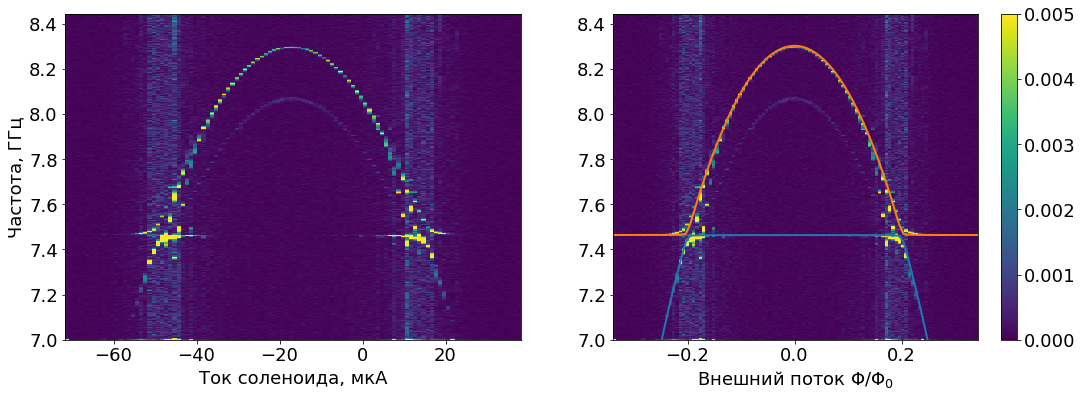

In [118]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
S21 = 10**(data[1][3]/10)*np.exp(1j*data[1][4])
delta = np.abs(S21.T-np.mean(S21.T, axis=0))
figs, axes = plt.subplots(1,2, figsize=(18,6))
axes[0].ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
axes[0].pcolormesh(data[1][0]*1e6, data[1][1]/1e9, delta, vmin=0, vmax=5e-3)
axes[0].set_xlabel('Ток соленоида, мкА')
axes[0].set_ylabel('Частота, ГГц')
axes[1].pcolormesh(data[1][0]*0.62e4+0.105, data[1][1]/1e9, delta, vmin=0, vmax=5e-3)
plt.colorbar(axes[1].get_children()[0])
ax_lims = axes[1].get_xlim()
axes[1].plot(fluxes, spectral_lines.T, linewidth=2)
axes[1].set_xlabel('Внешний поток $\\Phi/\\Phi_0$')
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_xlim(ax_lims)
#plt.plot(fluxes, wq_flux_dep/(2*np.pi))

In [116]:
axes[1].get_children()

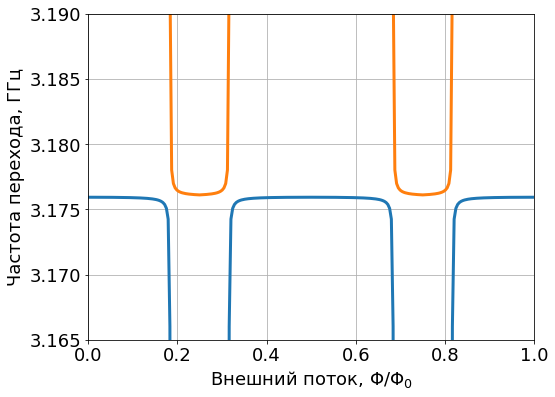

In [22]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,1]-energies[:,0])/1e9, label='$|0 \\rangle \\rightarrow |1 \\rangle$', linewidth=3)
plt.plot(fluxes, spectral_lines.T, linewidth=3)
plt.xlim([0, 1])
plt.ylim([3.165, 3.19])
plt.xlabel('Внешний поток, $\\Phi/\\Phi_0$')
plt.ylabel('Частота перехода, ГГц')
plt.grid()
#plt.legend(loc='upper right')


#plt.plot(fluxes, wq_flux_dep/(2*np.pi))

# Gleb's anticrossing formula

In [132]:
eta = 1
kappa = decay_rate_resonator 
gamma = decay_rate_qubit
S21_single_tone = lambda w, wq: eta/(kappa+1j*(wr-w)+g**2/(gamma+1j*(wq-w)))
S21_poles = lambda w0r, w0i, wq: [np.real((kappa+1j*(wr-(w0r+1j*w0i))+g**2/(gamma+1j*(wq-(w0r+1j*w0i))))), \
                                np.imag((kappa+1j*(wr-(w0r+1j*w0i))+g**2/(gamma+1j*(wq-(w0r+1j*w0i)))))]

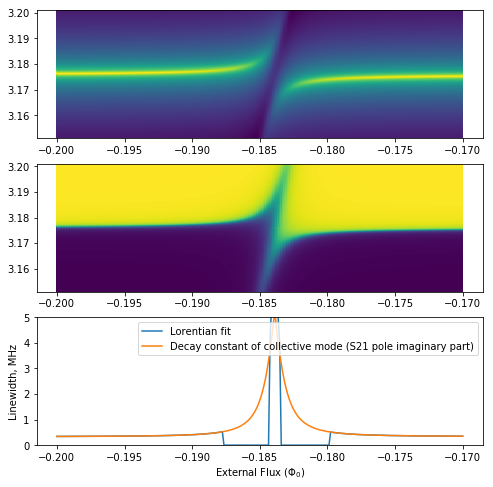

In [143]:
external_fluxes = np.linspace(-0.17, -0.20, 256)
drive_frequencies = np.linspace(wr/(2*pi)-25e-3, wr/(2*pi)+25e-3, 256) # 1 MHz step for qubit tone
wq_flux_dep = wq*np.sqrt(np.abs(np.cos(external_fluxes*np.pi*2)))
S21 = np.zeros((drive_frequencies.size, external_fluxes.size), dtype=np.complex)

for drive_freq_id, drive_freq in enumerate(drive_frequencies):
    for flux_id, flux in enumerate(external_fluxes):
        wq_flux = wq*np.sqrt(np.abs(np.cos(flux*np.pi*2)))
        S21[drive_freq_id, flux_id] = S21_single_tone(drive_freq*2*pi, wq_flux)

plt.figure(figsize=(8,8))
xax = plt.subplot(3,1,1); plt.pcolormesh(external_fluxes, drive_frequencies, np.log10(np.abs(S21))*20); #plt.colorbar()
plt.subplot(3,1,2, sharex=xax); xax = plt.pcolormesh(external_fluxes, drive_frequencies, np.angle(S21)).axes; #plt.colorbar()

from scipy.optimize import curve_fit
lorentian_real = lambda x, a, b, f0r, f0i: np.real((a+1j*b)/(x-f0r-1j*f0i))
lorentian_imag = lambda x, a, b, f0r, f0i: np.imag((a+1j*b)/(x-f0r-1j*f0i))

a0 = 1
b0 = 0
f0r = wr/(2*pi)
f0i = -kappa/(2*pi)


real_fits = []
imag_fits = []
for flux_id, flux in enumerate(external_fluxes):
    #real_fits.append(curve_fit(lorentian_real, drive_frequencies*2*pi, np.real(S21[:, flux_id]))[0][1])
    #try:    
    wq_flux = wq*np.sqrt(np.abs(np.cos(flux*np.pi*2)))
    from scipy.optimize import fsolve
    z = fsolve(lambda w0: S21_poles(w0[0], w0[1], wq_flux), [f0r, f0i])
    p0 = [a0, b0, z[0]/(2*pi), z[1]/(2*pi)]
    real_fits.append(z[1]/(2*pi))
    imag_fits.append(curve_fit(lorentian_imag, drive_frequencies, np.imag(S21[:, flux_id]), 
                                   bounds=((-np.inf, -np.inf, 3.156, -10e-3), (np.inf, np.inf, 3.196, 10e-3)))[0][3])
    #except:
    #    imag_fits.append(np.nan)
plt.subplot(3,1,3, sharex=xax); plt.plot(external_fluxes, np.abs(imag_fits)*1e3, label='Lorentian fit'); plt.ylim([0, 5])
plt.plot(external_fluxes, np.abs(real_fits)*1e3, label='Decay constant of collective mode (S21 pole imaginary part)')
plt.legend()
plt.xlabel('External Flux ($\\Phi_0$)')
plt.ylabel('Linewidth, MHz')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


In [81]:
curve_fit(lorentian_imag, drive_frequencies, np.imag(S21[:, 1]))

(array([  7.95532946e-02,   3.17612634e+00,   3.51956017e-04]),
 array([[  1.42455962e-04,  -2.27230763e-11,   6.30429510e-07],
        [ -2.27230763e-11,   2.78940627e-09,  -3.87035619e-13],
        [  6.30429510e-07,  -3.87035619e-13,   5.57939659e-09]]))

In [75]:
abs_fits[0][0]

IndexError: invalid index to scalar variable.

# Defining qubit and resonator decay (collapse) operators

In [8]:
# constructing lindblad operators
c_op_resonator = a*np.sqrt(decay_rate_resonator)
c_op_qubit = sm.dag()*np.sqrt(decay_rate_qubit)

# Simulating qubit decay

In [37]:
tlist = np.linspace(0,200,201).tolist() # 10000 nanoseconds with 1 nanosecond step

psi0 = tensor(basis(2,0), basis(2,0)) # initial state is an excited transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz] # check cativy photon number and qubit excitation (sz)

output = mesolve(H, psi0, tlist, c_ops, e_ops)

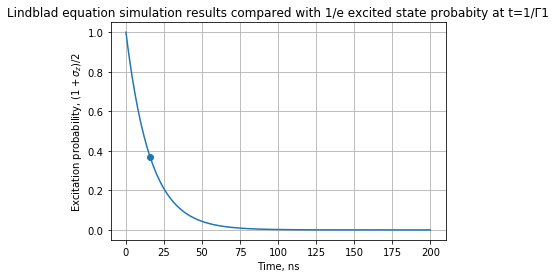

In [40]:
plt.plot(tlist, (1+output.expect[1])/2)
plt.grid()
plt.scatter(1/decay_rate_qubit, np.exp(-1))
plt.xlabel('Time, ns')
plt.ylabel('Excitation probability, $(1+\\sigma_z)/2$')
plt.title('Lindblad equation simulation results compared with 1/e excited state probabity at t=1/Γ1')

# Simulating qubit drive and decay

In [10]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz] # check cativy photon number and qubit excitation (sz)

drive_frequencies = np.linspace(5.0, 5.0, 1) # 1 MHz step for qubit tone
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    drive_envelope = lambda t, args: 8e-3*np.cos(t*drive_frequency*2*pi)
    H_driven = [H, [sx, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops)

#output

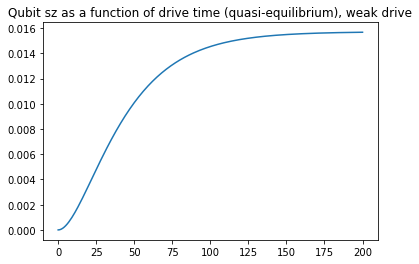

In [11]:
plt.plot(tlist, (output.expect[1]+1)/2)
plt.title('Qubit sz as a function of drive time (quasi-equilibrium), weak drive')

In [14]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz] # check cativy photon number and qubit excitation (sz)

drive_frequencies = np.linspace(5.0, 5.0, 1) # 1 MHz step for qubit tone
#drive_envelope = lambda t, args: args['A']*np.cos(t*args['drive_frequency']*2*args['pi'])
drive_envelope = 'A*cos(t*drive_frequency*2*pi)'
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    H_driven = [H, [sx, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops, args={'A':8e-2, 'drive_frequency':float(drive_frequency), 'pi':float(pi)})

#output

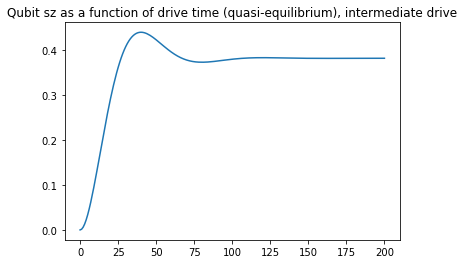

In [15]:
plt.plot(tlist, (output.expect[1]+1)/2)
plt.title('Qubit sz as a function of drive time (quasi-equilibrium), intermediate drive')

In [10]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz] # check cativy photon number and qubit excitation (sz)

drive_frequencies = np.linspace(5.0, 5.0, 1) # 1 MHz step for qubit tone
#drive_envelope = lambda t, args: args['A']*np.cos(t*args['drive_frequency']*2*args['pi'])
drive_envelope = 'A*cos(t*drive_frequency*2*pi)'
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    H_driven = [H, [sx, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops, args={'A':0.8, 'drive_frequency':float(drive_frequency), 'pi':float(pi)})

#output

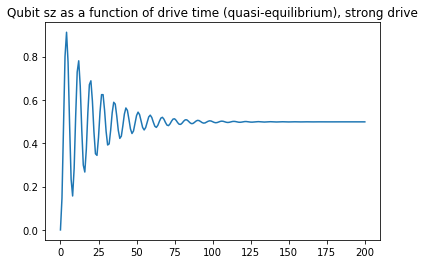

In [13]:
plt.plot(tlist, (output.expect[1]+1)/2)
plt.title('Qubit sz as a function of drive time (quasi-equilibrium), strong drive')

# Qubit \sigma_z as a function of detuning at low power

In [31]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz] # check cativy photon number and qubit excitation (sz)
sz_final = np.zeros(21)

drive_frequencies = np.linspace(4.98, 5.02, 21) # 2 MHz step for qubit tone
drive_envelope = 'A*cos(t*drive_frequency*2*pi)'
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    #drive_envelope = lambda t, args: 8e-3*np.cos(t*drive_frequency*2*pi)
    H_driven = [H, [sx, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops, args={'A':8e-3, 'drive_frequency':float(drive_frequency), 'pi':float(pi)})
    sz_final[drive_frequency_id]= ((output.expect[1]+1)/2)[-1]

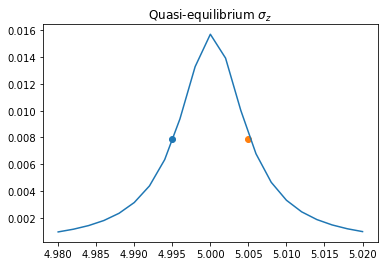

In [32]:
plt.plot(drive_frequencies, sz_final)
#FWHM is 10 MHz
FWHM_sz = 0.01
plt.scatter(wq/(2*pi)-FWHM_sz/2, np.max(sz_final)/2)
plt.scatter(wq/(2*pi)+FWHM_sz/2, np.max(sz_final)/2)
plt.title('Quasi-equilibrium $\\sigma_z$')

# Simulating resonator drive and decay

In [22]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz, a] # check cativy photon number and qubit excitation (sz)

wr_shifted = spectral_lines[0,1]
tlist = np.linspace(0,5000,5001) # 10000 nanoseconds with 1 nanosecond step

drive_frequencies = np.linspace(3.176 , 3.176 , 1) # 1 MHz step for qubit tone
drive_envelope = 'A*cos(t*drive_frequency*2*pi)'
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    #drive_envelope = lambda t, args: 2e-4*np.cos(t*drive_frequency*2*pi)
    H_driven = [H, [xc, drive_envelope]] # hamilotnian = JC hamintonian + resonator drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops, args={'A':8e-4, 'drive_frequency':float(drive_frequency), 'pi':float(pi)})

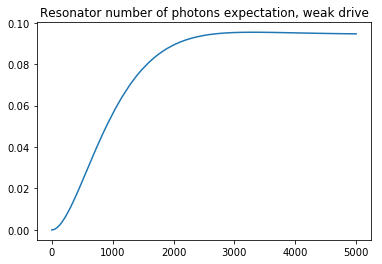

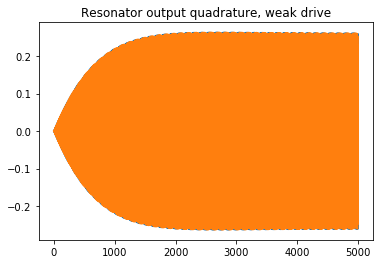

In [23]:
plt.plot(tlist, output.expect[0])
plt.title('Resonator number of photons expectation, weak drive')
plt.figure()
plt.plot(tlist, np.real(output.expect[2]))
plt.plot(tlist, np.imag(output.expect[2]))
plt.title('Resonator output quadrature, weak drive')

# S21 on the resonator (in arb. units)

In [25]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz, a] # check cativy photon number and qubit excitation (sz)
nc_final = np.zeros(21)
quadrature_final = np.zeros(21,dtype=np.complex)
S21 = np.zeros(21, dtype=np.complex)

tlist = np.linspace(0,2500,2501) # 10000 nanoseconds with 1 nanosecond step

frames = np.zeros((21, 2501), dtype=np.complex)


drive_frequencies = np.linspace(wr-dwr*2, wr+dwr*2, 21)/(2*pi) # 1 MHz step for qubit tone
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    drive_envelope = lambda t, args: 2e-4*np.cos(t*drive_frequency*2*pi)
    H_driven = [H, [xc, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops)
    nc_final[drive_frequency_id]= output.expect[0][-1]
    quadrature_final[drive_frequency_id] = output.expect[2][-1]
    frames[drive_frequency_id, :] = output.expect[2]
    S21[drive_frequency_id] = quadrature_final[drive_frequency_id]*np.exp(1j*2*pi*tlist[-1]*drive_frequency)

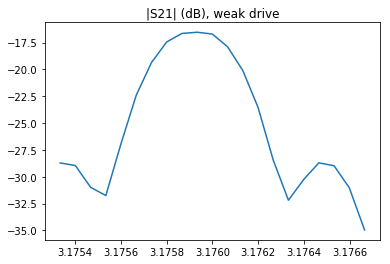

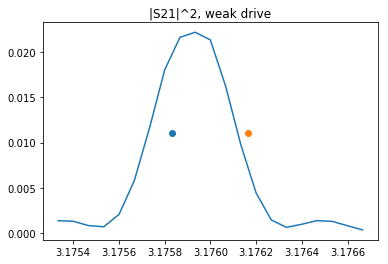

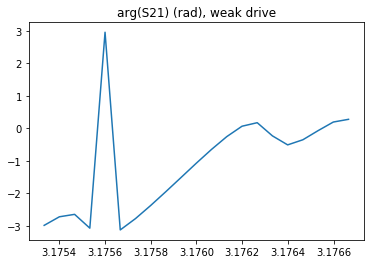

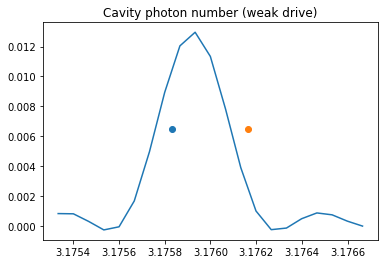

In [26]:
#plt.plot(drive_frequencies, nc_final)
#plt.title('Quasi-equilibrium number of photons expectation, weak drive')
plt.figure()
plt.plot(drive_frequencies, np.log10(np.abs(S21))*20)
plt.title('|S21| (dB), weak drive')
plt.figure()
plt.plot(drive_frequencies, np.abs(S21)**2)
plt.scatter((wr-dwr/2)/(2*np.pi), np.max(np.abs(S21)**2)/2)
plt.scatter((wr+dwr/2)/(2*np.pi), np.max(np.abs(S21)**2)/2)
plt.title('|S21|^2, weak drive')
plt.figure()
plt.plot(drive_frequencies, np.angle(quadrature_final*np.exp(1j*2*pi*tlist[-1]*drive_frequencies)))
plt.title('arg(S21) (rad), weak drive')
plt.figure()
plt.plot(drive_frequencies, nc_final)
plt.scatter((wr-dwr/2)/(2*np.pi), np.max(nc_final)/2)
plt.scatter((wr+dwr/2)/(2*np.pi), np.max(nc_final)/2)
plt.title('Cavity photon number (weak drive)')

# S21 on the resonator with applied drive on the qubit (two-tone spectroscopy)

In [29]:
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz, a] # check cativy photon number and qubit excitation (sz)
nc_final = np.zeros(21)
quadrature_final = np.zeros(21,dtype=np.complex)
S21 = np.zeros(21, dtype=np.complex)

tlist = np.linspace(0,2500,2501) # 10000 nanoseconds with 1 nanosecond step

drive_frequencies = np.linspace(4.98, 5.02, 21) # 2 MHz step for qubit tone
for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
    drive_envelope_r = lambda t, args: 2e-4*np.cos(t*3.1759*2*pi) # driving resonator @ res frequency
    drive_envelope_q = lambda t, args: 8e-3*np.cos(t*drive_frequency*2*pi) # driving qubit @ qubit frequency
    H_driven = [H, [xc, drive_envelope_r], [sx, drive_envelope_q]] # hamilotnian = JC hamintonian + qubit drive 
    output = mesolve(H_driven, psi0, tlist, c_ops, e_ops)
    nc_final[drive_frequency_id]= output.expect[0][-1]
    quadrature_final[drive_frequency_id] = output.expect[2][-1]
    S21[drive_frequency_id] = quadrature_final[drive_frequency_id]/np.exp(1j*tlist[-1]*3.1759*2*pi)

# Main result: two-tone spectroscopy at the sweet spot

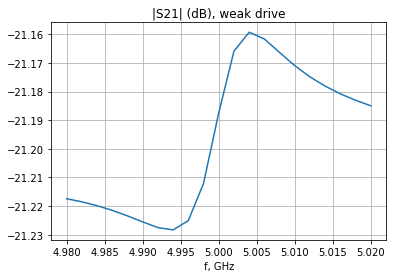

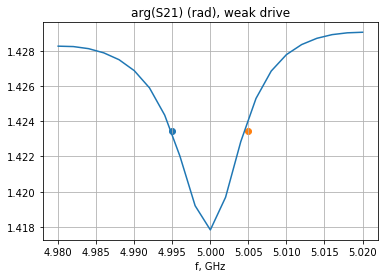

In [42]:
#plt.plot(drive_frequencies, nc_final)
#plt.title('Quasi-equilibrium number of photons expectation, weak drive')
plt.figure()
plt.plot(drive_frequencies, np.log10(np.abs(S21))*20)
plt.title('|S21| (dB), weak drive')
plt.xlabel('f, GHz')
plt.grid()
plt.figure()
plt.plot(drive_frequencies, np.angle(S21))
plt.title('arg(S21) (rad), weak drive')
plt.scatter(wq/(2*pi)-FWHM_sz/2, (np.max(np.angle(S21))+np.min(np.angle(S21)))/2)
plt.scatter(wq/(2*pi)+FWHM_sz/2, (np.max(np.angle(S21))+np.min(np.angle(S21)))/2)
plt.xlabel('f, GHz')
plt.grid()

# Simulating the anticrossing

In [ ]:
import time
psi0 = H.eigenstates()[1][0] # initial state is a ground-state transmon
c_ops = [c_op_resonator, c_op_qubit]
e_ops = [nc, sz, a] # check cativy photon number and qubit excitation (sz)
nc_final = np.zeros((61, 65))
quadrature_final = np.zeros((61, 65),dtype=np.complex)
S21 = np.zeros((61,65), dtype=np.complex)

tlist = np.linspace(0,2500,2501) # 10000 nanoseconds with 1 nanosecond step

#frames = np.zeros((21, 2501), dtype=np.complex)
external_fluxes = np.linspace(0.17, 0.19, 65)

last_time = time.time()
drive_frequencies = np.linspace(wr/(2*pi)-3e-3, wr/(2*pi)+3e-3, 61) # 1 MHz step for qubit tone
for external_flux_id, external_flux in enumerate(external_fluxes):
    for drive_frequency_id, drive_frequency in enumerate(drive_frequencies):
        drive_envelope = lambda t, args: 2e-4*np.cos(t*drive_frequency*2*pi)
        H_driven = [H, [xc, drive_envelope]] # hamilotnian = JC hamintonian + qubit drive 
        output = mesolve(H_driven, psi0, tlist, c_ops, e_ops)
        nc_final[drive_frequency_id, external_flux_id]= output.expect[0][-1]
        quadrature_final[drive_frequency_id, external_flux_id] = output.expect[2][-1]
        #frames[drive_frequency_id, :] = output.expect[2]
        S21[drive_frequency_id, external_flux_id] = quadrature_final[drive_frequency_id, external_flux_id]*\
                np.exp(1j*2*pi*tlist[-1]*drive_frequency)
        this_time = time.time()
        print ('external_flux_id: {0: 2d}/{1: 2d}, drive_frequency_id: {2: 2d}/{3: 2d}, cycle time: {4:4.2f} s'.format(\
            external_flux_id, 65, drive_frequency_id, 61, this_time-last_time), end='\r')
        